In [23]:
import numpy as np
import networkx as nx
import array_to_latex as a2l
import matplotlib.pyplot as plt

In [24]:
nodes = 5
node_colors = np.array([
    "grey",
    "red",
    "green",
    "blue",
])
labels = np.array([-1, 0, 1, 1, -1])

arr_edges = np.array([
    [0, 1, 0, 0, 0],
    [1, 0, 0, 0, 1],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1],
    [0, 1, 1, 1, 0]
])

edges = []
for i, row in enumerate(arr_edges):
    indices = list(np.where(row==1))
    for j in indices[0]:
        edges.append((i, j))
print(edges)

[(0, 1), (1, 0), (1, 4), (2, 4), (3, 4), (4, 1), (4, 2), (4, 3)]


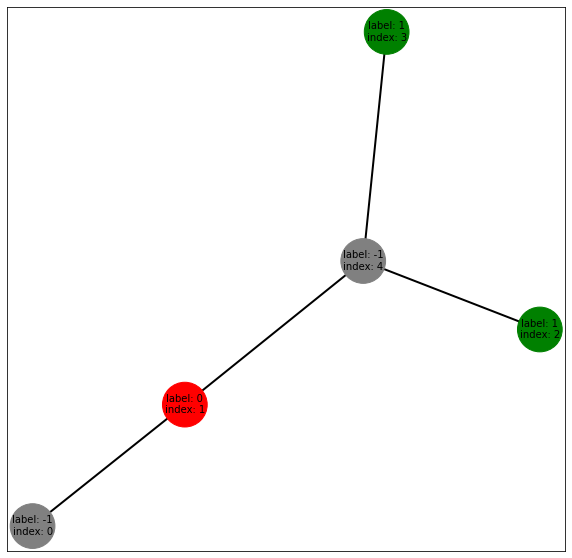

In [25]:
np.random.seed(33)
plt.subplots(1, 1, figsize=(10, 10))
G = nx.Graph()

G.add_nodes_from([x for x in range(5)])
G.add_edges_from(edges)
pos = nx.spring_layout(G)

colors = node_colors[(labels+1)]
labs = {x: f"label: {l}\nindex: {x}" for x, l in enumerate(labels)}

nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=colors)
nx.draw_networkx_labels(G, pos, labels=labs, font_size=10)
nx.draw_networkx_edges(G, pos, width=2)

plt.savefig("graphexample.png")

In [26]:
a2l.to_clp(arr_edges, frmt='{:1.0f}')

In [27]:
oht = np.eye(2, dtype=np.int8)[labels.reshape(-1)]
a2l.to_clp(oht, frmt='{:1.0f}')

In [28]:
a2l.to_clp(labels)

In [29]:
oht_labels = np.eye(10, dtype=np.int8)[np.array(labels, dtype=int).reshape(-1)]
oht = np.array(oht_labels, dtype=int)
oht[[0, 4], :] = 0
a2l.to_clp(oht, frmt="{:1.0f}")
print(oht)

[[0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [36]:
from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize

In [34]:
sparse_oht = csr_matrix(oht)
sparse_g = csr_matrix(arr_edges)


In [40]:
p = sparse_g.dot(sparse_oht)
a2l.to_clp(p.toarray(), frmt="{:1.0f}")
print(p.toarray())

[[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 2 0 0 0 0 0 0 0 0]]


In [43]:
n = normalize(p, norm="l1", axis=1)
print(n.toarray())
a2l.to_clp(n.toarray(), frmt="{:1.1f}")

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.33333333 0.66666667 0.         0.         0.         0.
  0.         0.         0.         0.        ]]
